# The Discounted Cash Flow (DCF) model

This Notebook will be used for calculating the Discounted Cash Flow (DCF) model as described in the Medium Post [Sure you know the stock price. But do you know its value?](https://medium.com/@sankha.mukherjee_007/sure-you-know-the-stock-price-but-do-you-know-its-value-65ab44dadd04) in Section 4.2. There are many versions of this model, and this implementation here is one of the more simpler implementations of the DCF model. 

This implementation will be as close as possible to the original article so that one is able to easily follow the original article and this one.

In [1]:
import financeMacroFactors as fM
import pandas as pd
import numpy as np
from scipy import interpolate
from datetime import timedelta as tDel
import matplotlib.pyplot as plt

In [2]:
fundamentals = fM.companies.getTickerFundamentalDataMW('MSFT')

## Find the Earnings Per Share (Free Cash Flow)

The following things need to be extracted form the fundamental data:
 - Free Cash Flow vector **f** over the last 5 years. This is converted into a Numpy array `f1`.
 - The number of shares outstanding **s** over the alst 5 years. This is put into the Numpy array `s`
 - The FCF/share. This is put into the Numpy array `f_s`

### Calculating the `f1`:

In [10]:
fcf = fM.companies.extractYearlyData(fundamentals['CashFlow'], 'Free Cash Flow')
y, f1 = zip(*fcf)
f1 = np.array(f1)
print(f'--------[Free Cash Flow]------------')
print(f'Years: {[m.year for m in y]}')
print(f'FCF during that time: f1 = {f1}')

--------[Free Cash Flow]------------
Years: [2016, 2017, 2018, 2019, 2020]
FCF during that time: f1 = [2.498e+10 3.138e+10 3.225e+10 3.826e+10 4.523e+10]


### Calculating the `s`

In [9]:
shares = fM.companies.extractYearlyData(fundamentals['IncomeStatement'], 'Diluted Shares Outstanding')
shares
ya, s = zip(*shares)
s = np.array(s)
print(f'--------[Diluted shares Outstanding]------------')
print(f'Years: {[m.year for m in ya]}')
print(f'Diluted shares outstanding: s = {s}')

--------[Diluted shares Outstanding]------------
Years: [2016, 2017, 2018, 2019, 2020]
Diluted shares outstanding: s = [8.01e+09 7.83e+09 7.79e+09 7.75e+09 7.68e+09]


### Calculating the `f_s`:

In [14]:
f_s1 = f1/s
print(f'FCF per share over the last few years = {f_s1}')

FCF per share over the last few years = [3.11860175 4.00766284 4.13992298 4.93677419 5.88932292]


## Extrapolate so that we can find the FCF/share for the next 5 years

The extrapolation is simple. This assumes that there are 365 days in each year. This may not be the case, but should not affect our calculations significantly, gven the type of approximations that are already involved.

In [23]:
xVals = [(m-y[0]).days for m in y ]
futureYears = [ (y[-1] + tDel(i*365) ) for i in range(1,6)]
xExt  = [(m-y[0]).days for m in futureYears ]
f = interpolate.interp1d(xVals, f_s1, fill_value="extrapolate")
f_s = f(xExt)

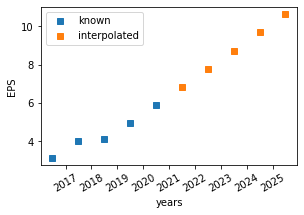

In [17]:
plt.figure(figsize=(4, 4/1.618))
plt.axes([0.1, 0.1, 0.89, 0.89])

plt.plot(y, f_s1, 's', label='known')
plt.plot(futureYears, f_s, 's', label='interpolated')


plt.xticks(rotation=30)
plt.xlabel('years')
plt.ylabel('EPS')
plt.legend()

plt.show()
plt.close('all')

## Add the terminal value

for the last interpolated value, change it to 10$\times$ its projexted value

In [24]:
f_s[-1] *= 10
f_s

array([  6.83926905,   7.78921518,   8.73916131,   9.68910744,
       106.39053572])

## Generate the discounting factors

In [25]:
d = (np.ones(5)*1.1)**np.arange(-1,-6, -1)

## Generate the DCF value

In [26]:
dcf = f_s @ d
print(f'Discounted Future Value = ${dcf:.2f}')

Discounted Future Value = $91.90
